In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('TeamX_-_Data_20220704_144008_946162966_3755045935_With_Model.csv')

In [3]:
df['Date'].nunique()

351

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108703 entries, 0 to 108702
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          108702 non-null  object 
 1   Campaign                      108702 non-null  object 
 2   Insertion Order               108691 non-null  object 
 3   Line Item                     108691 non-null  object 
 4   Country                       108691 non-null  object 
 5   Media Type                    108691 non-null  object 
 6   Creative                      108691 non-null  object 
 7   Impressions                   108692 non-null  float64
 8   Clicks                        108692 non-null  float64
 9   Total Conversions             108692 non-null  float64
 10  First-Quartile Views (Video)  108692 non-null  float64
 11  Midpoint Views (Video)        108692 non-null  float64
 12  Third-Quartile Views (Video)  108692 non-nul

In [11]:
df.describe()

,Impressions,Clicks,Total Conversions,First-Quartile Views (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video),Starts (Video),Media Cost (USD)
count,1.086910e+05,108691.000000,108691.000000,108691.000000,108691.000000,108691.000000,108691.000000,108691.000000,108691.000000
mean,2.112727e+03,12.899753,0.391458,586.290392,455.349909,404.401165,372.471971,745.411064,8.685661
std,1.226623e+04,62.180489,3.915176,3617.035422,3029.450029,2841.645258,2747.368453,4508.786172,52.408419
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059799
50%,1.230000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.590785
75%,7.880000e+02,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.494483
max,1.068478e+06,3986.000000,454.000000,229249.000000,220884.000000,216981.000000,215868.000000,240527.000000,6304.020200


In [6]:
#Converting the date column from object to datetime
df.drop(df[df['Date'].str.contains('[a-zA-Z]') == True].index, inplace = True)
df['Date']=df['Date'].astype('datetime64[ns]')
df= df.dropna(subset=['Date'])

In [7]:
phase=[]

for campaign_name in df['Insertion Order']:
    if 'AWRN' in str(campaign_name):
        phase.append('Awareness')
    elif "CONS" in str(campaign_name):
        phase.append('Consideration')
    elif 'PRCH' in str(campaign_name) or 'Decision' in str(campaign_name):
        phase.append('Decision')
    else:
        phase.append(None)

df['phase']=phase
df['phase'].value_counts()

Consideration    69208
Decision         22049
Awareness        17423
Name: phase, dtype: int64

In [8]:
df_no_zeroes= df[df['Media Cost (USD)'] > 0]
df_no_zeroes.shape

(105159, 18)

## Simple plotting of variables of interest + boxplots

1. Spend

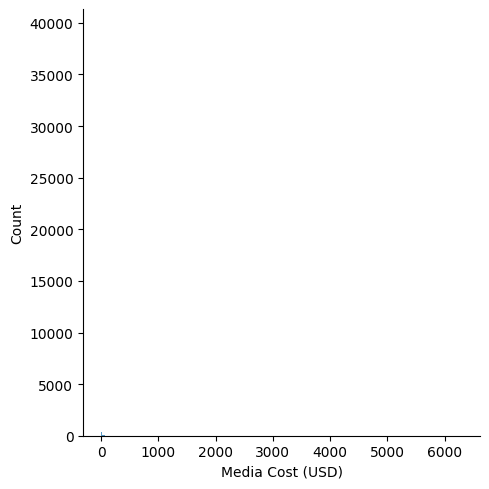

In [9]:
sns.displot(x=df['Media Cost (USD)'])

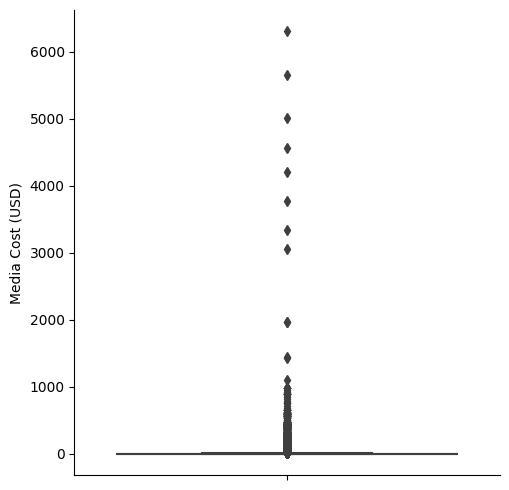

In [12]:
sns.catplot(y='Media Cost (USD)', data=df, kind= 'box')

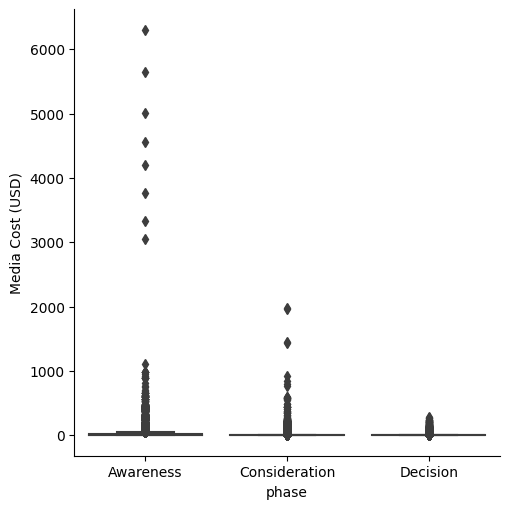

In [13]:
sns.catplot(x='phase', y='Media Cost (USD)', data=df, kind= 'box')

In [14]:
df_no_zeroes[df_no_zeroes['phase'] == 'Awareness']['Media Cost (USD)'].describe()

count    16940.000000
mean        28.293666
std        120.969638
min          0.000013
25%          1.580000
50%          7.710537
75%         24.535158
max       6304.020200
Name: Media Cost (USD), dtype: float64

In [15]:
df_no_zeroes[df_no_zeroes['phase'] == 'Consideration']['Media Cost (USD)'].describe()

count    67459.000000
mean         5.355862
std         23.918291
min          0.000010
25%          0.052255
50%          0.390479
75%          2.572500
max       1973.296230
Name: Media Cost (USD), dtype: float64

In [16]:
df_no_zeroes[df_no_zeroes['phase'] == 'Decision']['Media Cost (USD)'].describe()

count    20760.000000
mean         4.983496
std         14.307537
min          0.000010
25%          0.081858
50%          0.603439
75%          3.612191
max        286.523860
Name: Media Cost (USD), dtype: float64

2. Clicks

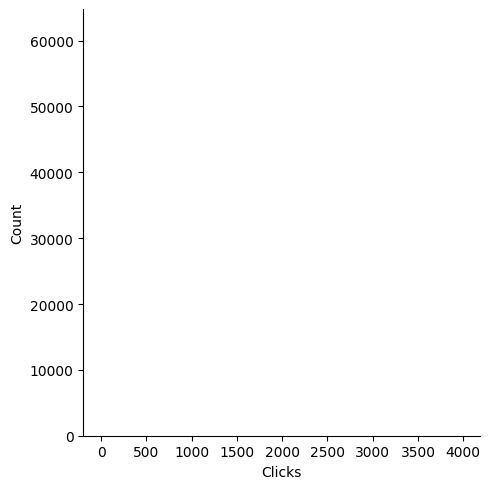

In [18]:
sns.displot(x=df['Clicks'])

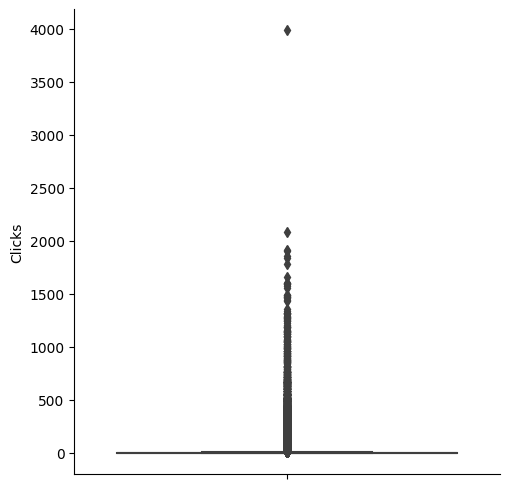

In [19]:
sns.catplot(y='Clicks', data=df, kind= 'box')

In [20]:
df['Clicks'].describe()

count    108691.000000
mean         12.899753
std          62.180489
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        3986.000000
Name: Clicks, dtype: float64

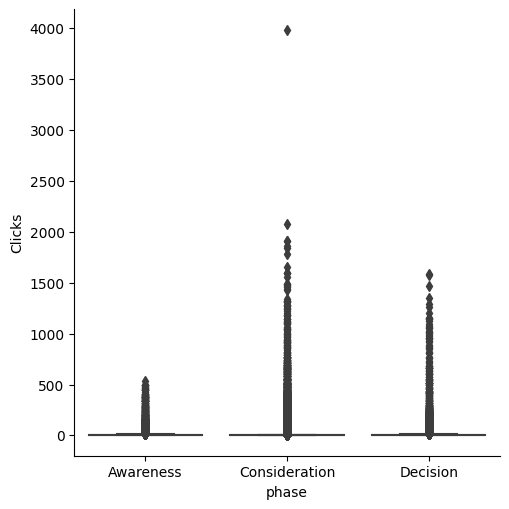

In [21]:
sns.catplot(x='phase', y='Clicks', data=df, kind= 'box')

In [22]:
df_no_zeroes[df_no_zeroes['phase'] == 'Awareness']['Clicks'].describe()

count    16940.000000
mean        10.165171
std         34.697437
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max        531.000000
Name: Clicks, dtype: float64

In [23]:
df_no_zeroes[df_no_zeroes['phase'] == 'Consideration']['Clicks'].describe()

count    67459.000000
mean        13.248566
std         67.742435
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max       3986.000000
Name: Clicks, dtype: float64

In [24]:
df_no_zeroes[df_no_zeroes['phase'] == 'Decision']['Clicks'].describe()

count    20760.000000
mean        16.174663
std         65.603392
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max       1590.000000
Name: Clicks, dtype: float64

3. Leads

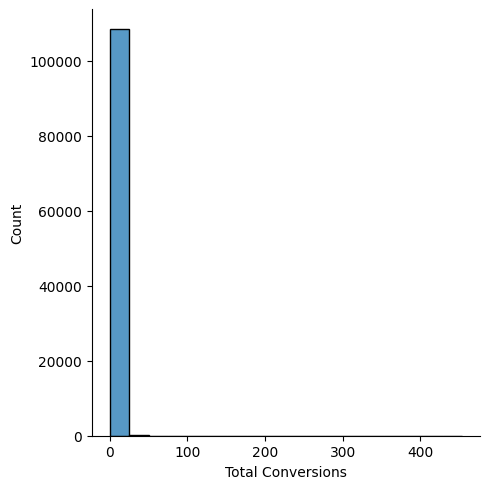

In [25]:
sns.displot(x=df['Total Conversions'])

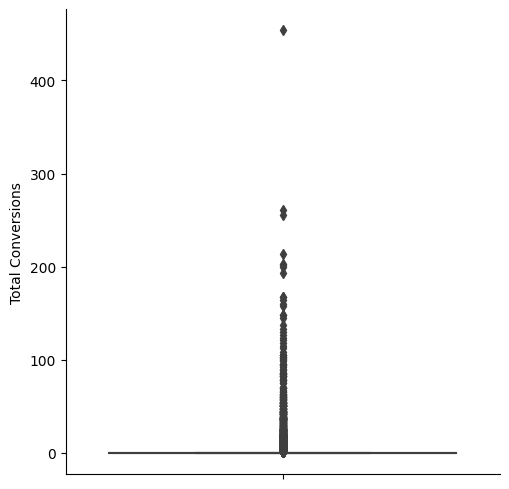

In [26]:
sns.catplot(y='Total Conversions', data=df, kind= 'box')

In [27]:
df['Total Conversions'].describe()

count    108691.000000
mean          0.391458
std           3.915176
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         454.000000
Name: Total Conversions, dtype: float64

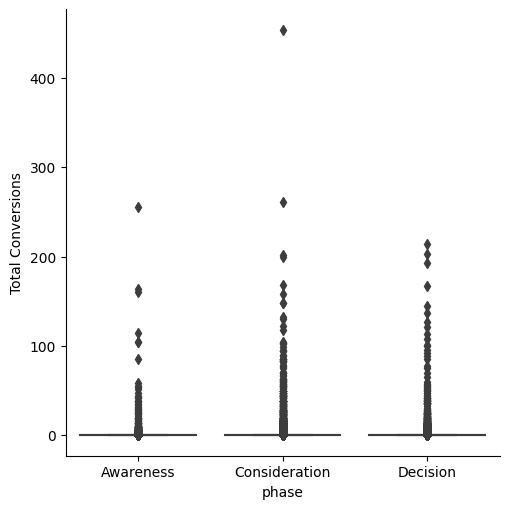

In [28]:
sns.catplot(x='phase', y='Total Conversions', data=df, kind= 'box')

In [29]:
df_no_zeroes[df_no_zeroes['phase'] == 'Awareness']['Total Conversions'].describe()

count    16940.000000
mean         0.081700
std          0.786829
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         37.000000
Name: Total Conversions, dtype: float64

In [30]:
df_no_zeroes[df_no_zeroes['phase'] == 'Consideration']['Total Conversions'].describe()

count    67459.000000
mean         0.166842
std          1.720041
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        202.000000
Name: Total Conversions, dtype: float64

In [31]:
df_no_zeroes[df_no_zeroes['phase'] == 'Decision']['Total Conversions'].describe()

count    20760.000000
mean         0.439017
std          1.736742
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         43.000000
Name: Total Conversions, dtype: float64

4. Impressions

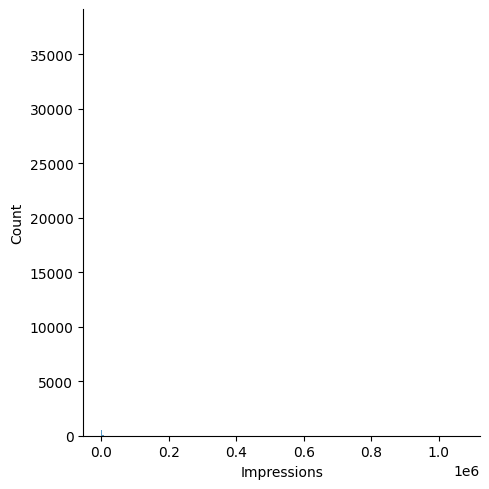

In [32]:
sns.displot(x=df['Impressions'])

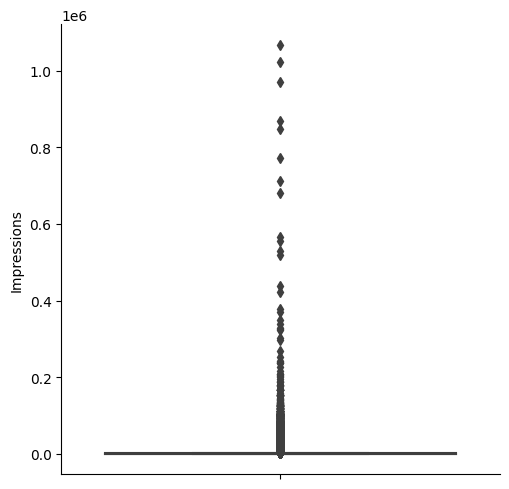

In [33]:
sns.catplot(y='Impressions', data=df, kind= 'box')

In [34]:
df['Impressions'].describe()

count    1.086910e+05
mean     2.112727e+03
std      1.226623e+04
min      0.000000e+00
25%      1.300000e+01
50%      1.230000e+02
75%      7.880000e+02
max      1.068478e+06
Name: Impressions, dtype: float64

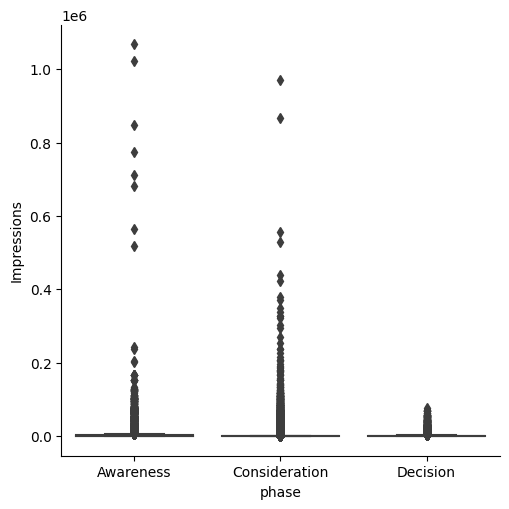

In [35]:
sns.catplot(x='phase', y='Impressions', data=df, kind= 'box')

In [39]:
df_no_zeroes[df_no_zeroes['phase'] == 'Awareness']['Impressions'].describe()

count    1.694000e+04
mean     5.040103e+03
std      2.181863e+04
min      1.000000e+00
25%      1.280000e+02
50%      6.075000e+02
75%      2.526000e+03
max      1.068478e+06
Name: Impressions, dtype: float64

In [40]:
df_no_zeroes[df_no_zeroes['phase'] == 'Consideration']['Impressions'].describe()

count     67459.000000
mean       1706.248047
std       10725.631369
min           1.000000
25%          11.000000
50%          79.000000
75%         511.000000
max      970077.000000
Name: Impressions, dtype: float64

In [41]:
df_no_zeroes[df_no_zeroes['phase'] == 'Decision']['Impressions'].describe()

count    20760.000000
mean      1404.296532
std       4087.705430
min          1.000000
25%         29.000000
50%        193.000000
75%       1001.000000
max      77038.000000
Name: Impressions, dtype: float64

## Simple Scatter plotting

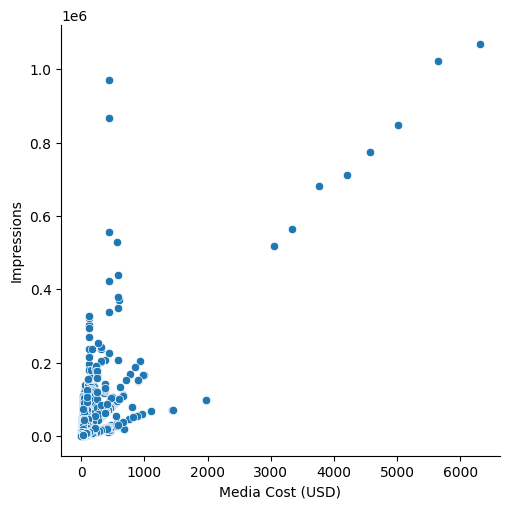

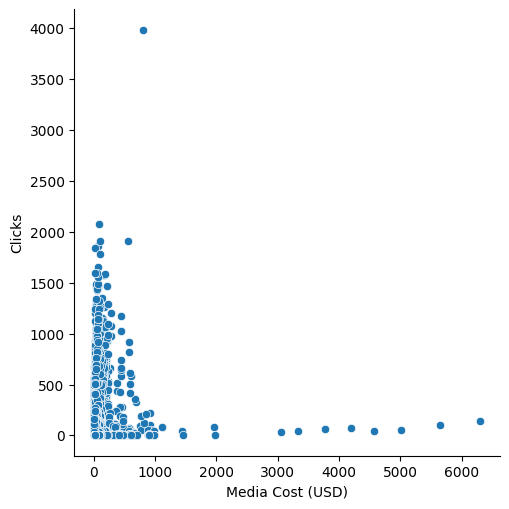

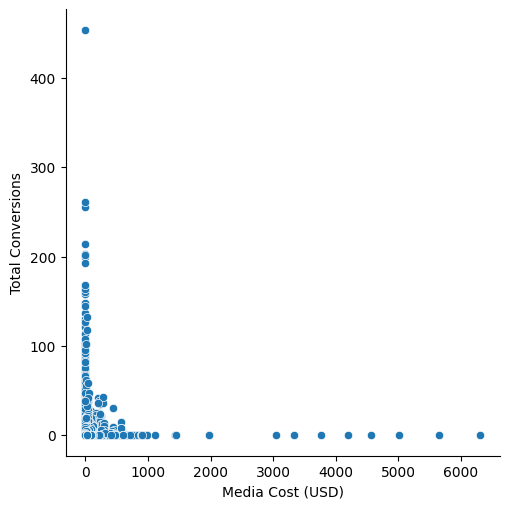

In [43]:
cols=['Impressions', 'Clicks', 'Total Conversions']
for c in cols:
    sns.relplot(x='Media Cost (USD)', y=c, kind='scatter', data=df)
    plt.show()

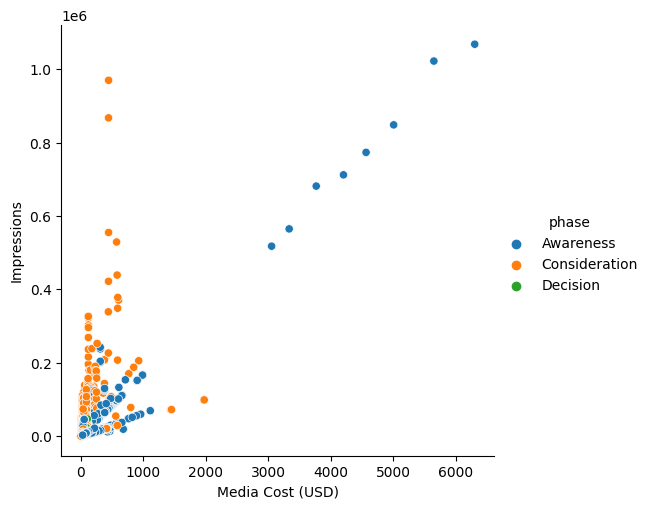

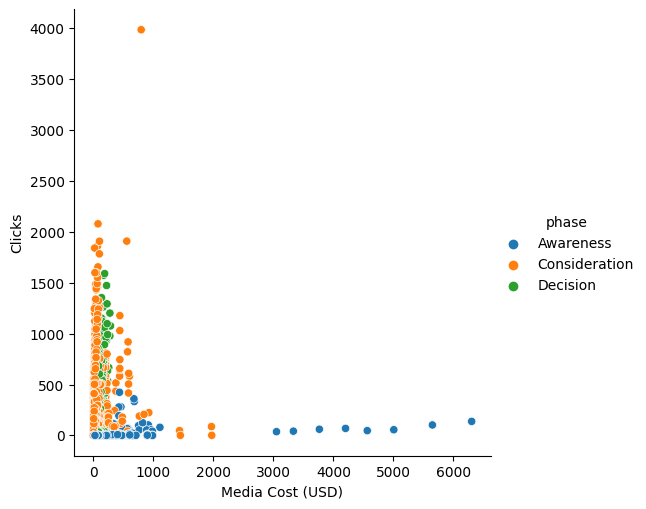

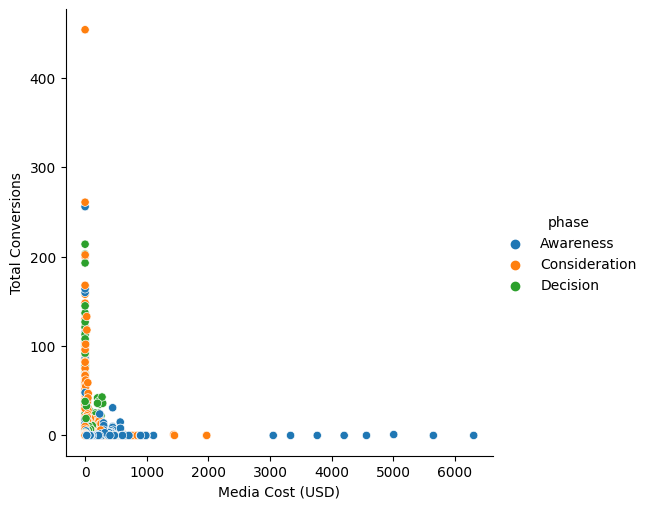

In [44]:
cols=['Impressions', 'Clicks', 'Total Conversions']
for c in cols:
    sns.relplot(x='Media Cost (USD)', y=c, kind='scatter', hue='phase', data=df)
    plt.show()

## Correlation

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_48886/937001669.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


NameError: name 'k' is not defined

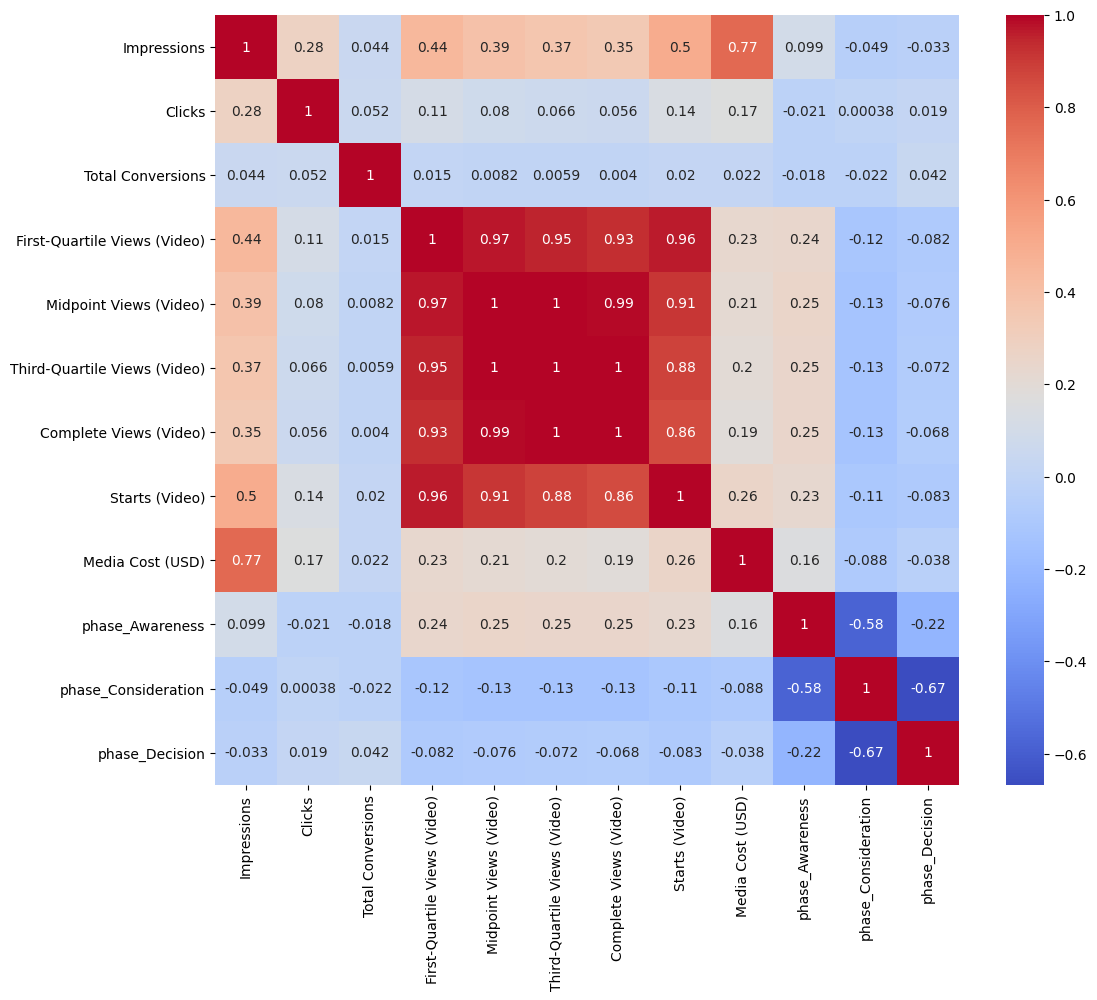

In [45]:
phases= pd.get_dummies(df['phase'], prefix='phase')
df= pd.concat([df, phases], axis=1)

correlation_matrix = df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()

## Line according to time

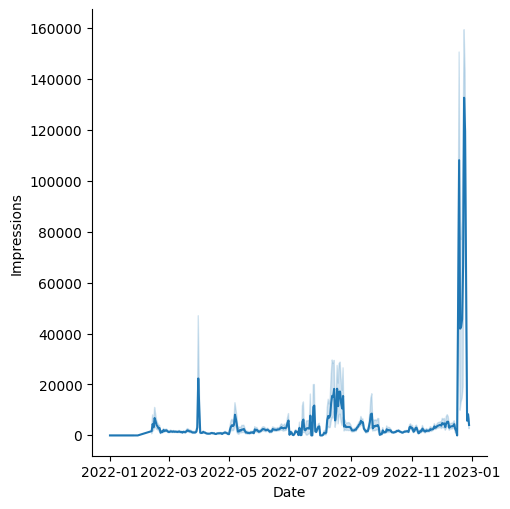

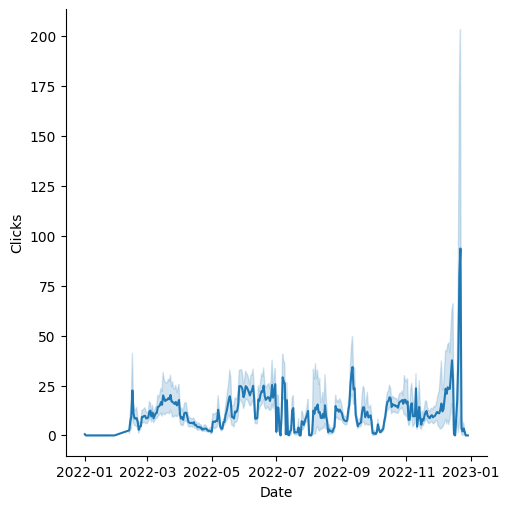

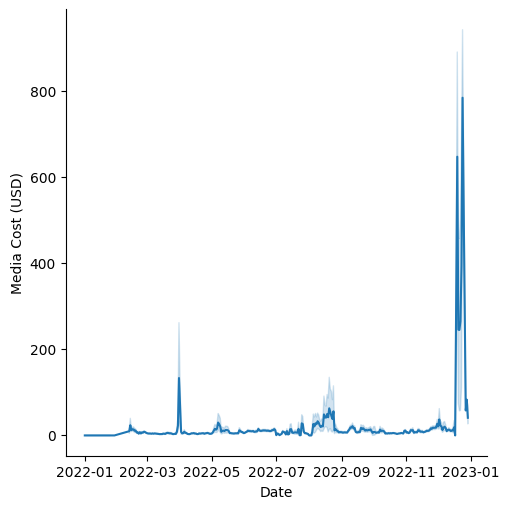

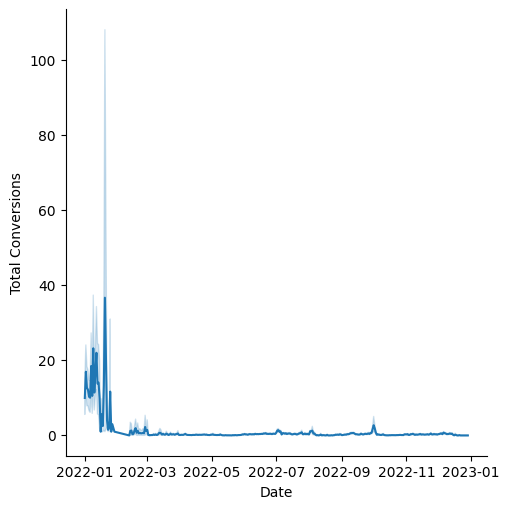

In [46]:
columns=['Impressions', 'Clicks', 'Media Cost (USD)', 'Total Conversions']
for c in columns:
    sns.relplot(x='Date', y=c, data=df, kind='line')

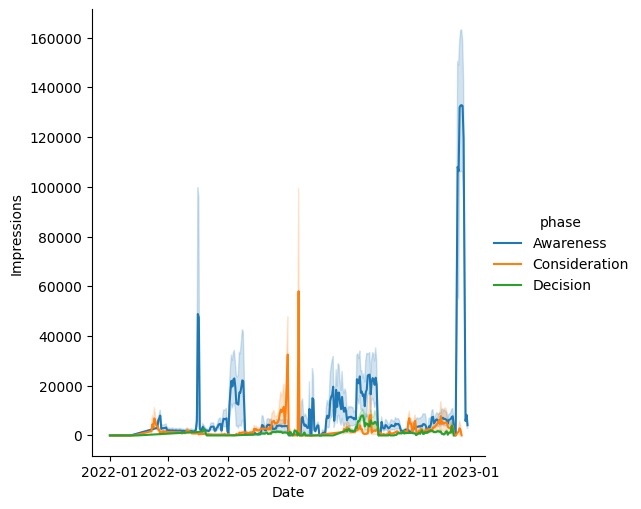

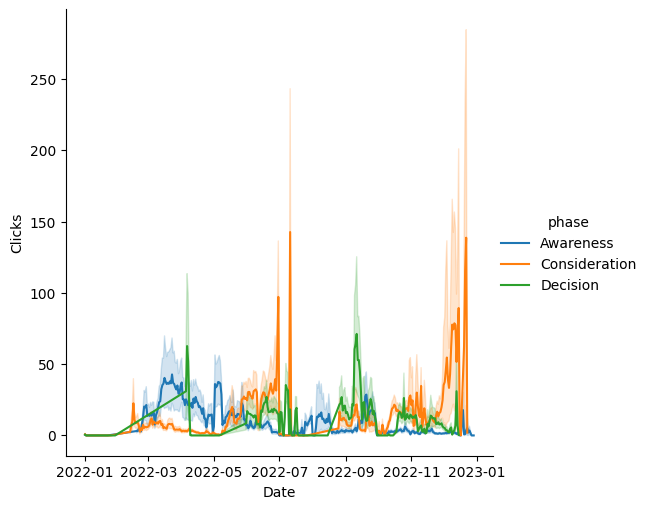

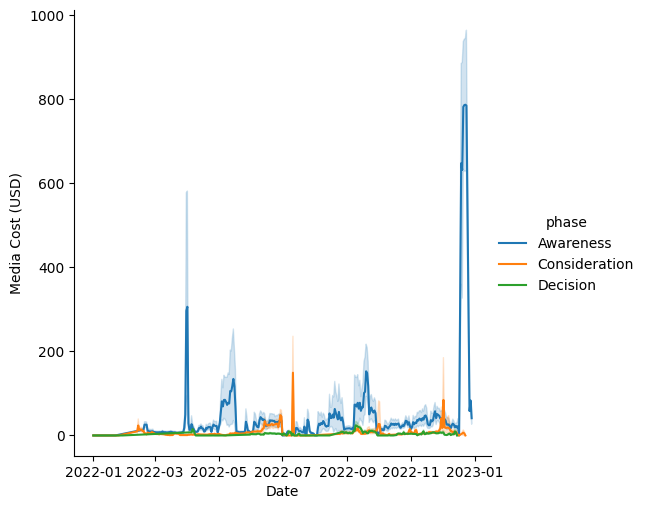

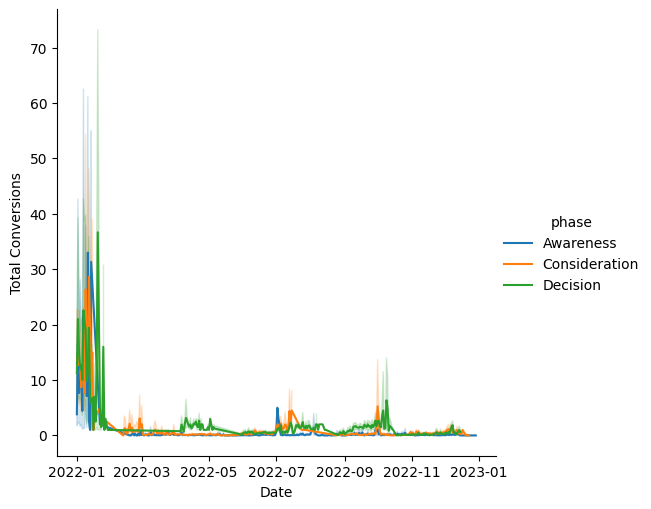

In [47]:
columns=['Impressions', 'Clicks', 'Media Cost (USD)', 'Total Conversions']
for c in columns:
    sns.relplot(x='Date', y=c, hue='phase', data=df, kind='line')

## Formatting the dataset 

In [48]:
#Formatting in weekly format

# Group the data by week and calculate the sum of the ad metrics
df_weekly = df.groupby(pd.Grouper(key='Date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_weekly = df_weekly.reset_index()

# Rename the 'date' column to 'week'
df_weekly = df_weekly.rename(columns={'Date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_weekly['week_number'] = df_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_48886/3521144907.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.groupby(pd.Grouper(key='Date', freq='W-SUN')).sum()
/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_48886/3521144907.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_weekly['week_number'] = df_weekly['week_end'].dt.week


,week_end,Impressions,Clicks,Total Conversions,First-Quartile Views (Video),Midpoint Views (Video),Third-Quartile Views (Video),Complete Views (Video),Starts (Video),Media Cost (USD),phase_Awareness,phase_Consideration,phase_Decision,week_number
0,2022-01-02,8.0,85.0,3787.0,51.0,32.0,25.0,21.0,64.0,0.042930,59,147,72,52
1,2022-01-09,0.0,0.0,8397.0,0.0,0.0,0.0,0.0,0.0,0.000000,102,336,186,1
2,2022-01-16,0.0,0.0,2990.0,0.0,0.0,0.0,0.0,0.0,0.000000,28,106,60,2
3,2022-01-23,0.0,0.0,221.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,2,17,3
4,2022-01-30,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,2,6,4
5,2022-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,5
6,2022-02-13,266347.0,410.0,52.0,0.0,0.0,0.0,0.0,0.0,1453.250000,0,87,0,6
7,2022-02-20,2481628.0,6370.0,700.0,134234.0,115027.0,105928.0,98426.0,160339.0,6724.170279,30,597,0,7
8,2022-02-27,1371834.0,5723.0,708.0,449666.0,373428.0,338763.0,309242.0,605239.0,5478.566291,190,654,0,8
9,2022-03-06,2185061.0,15031.0,576.0,615433.0,516250.0,469921.0,431006.0,809953.0,6801.933782,402,1053,0,9


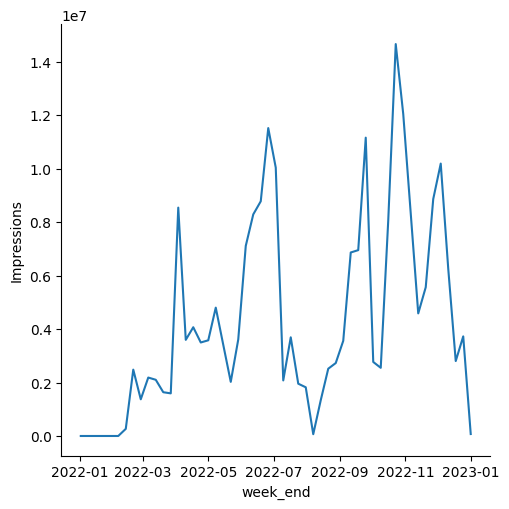

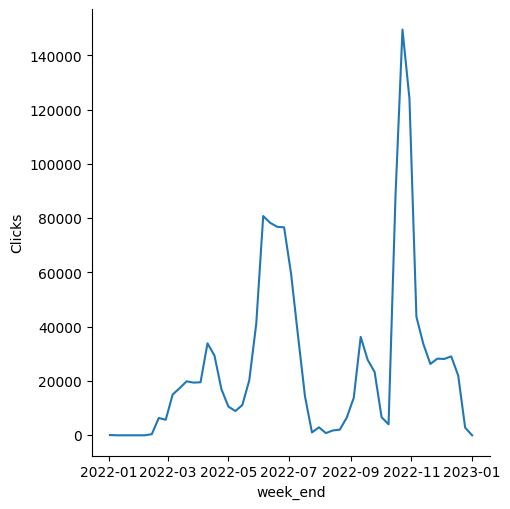

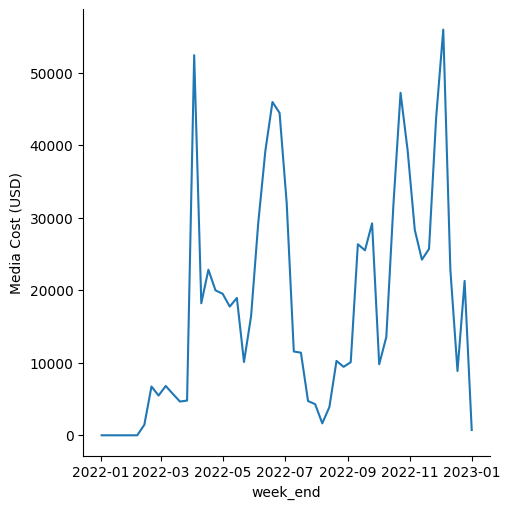

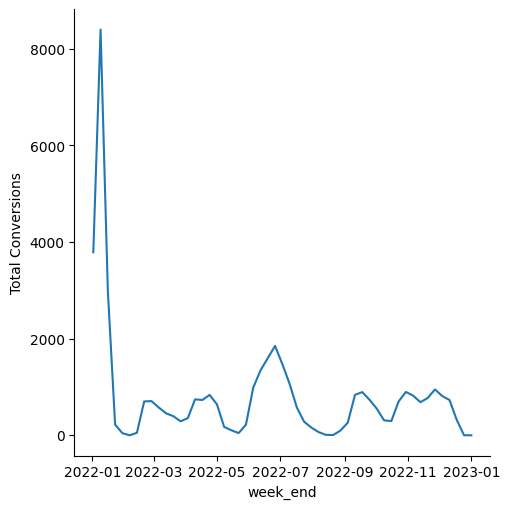

In [50]:
columns=['Impressions', 'Clicks', 'Media Cost (USD)', 'Total Conversions']
for c in columns:
    sns.relplot(x='week_end', y=c, data=df_weekly, kind='line')

In [1]:
df_final = df_weekly[['Impressions', 'Clicks', 'Media Cost (USD)', 'Total Conversions', 'week_end', 'week_number']]
df_final= df_final.rename(columns={'Impressions':'impressions_dv360', 'Media Cost (USD)': 'spend_dv360', 'Clicks': 'clicks_dv360', 'Total Conversions': 'leads_dv360'})
df_final.to_csv('final_dv360.csv')

NameError: name 'df_weekly' is not defined